# IDS Group Project: Wine Quality

## Members:
* Kritika Aggarwal
* Anjali Toshniwal
* Vrinda Sharda
* Mehak Singhal

## About the project
Our final aim is to be able to make prediction on the quality of wine given to us based on the parameters of our data set.

## About the Data Set:
This data set has been taken from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) and is duly appreciated.

## Importing libraries and Data

In [7]:
#Importing the required Libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#Reading the Data 
path="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
WineData=pd.read_csv(path, sep=";")
# View first 5 entries of the dataset.
WineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
#imensions of the data set
WineData.shape

(1599, 12)

In [10]:
#Attributes in the Data
WineData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
WineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
WineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


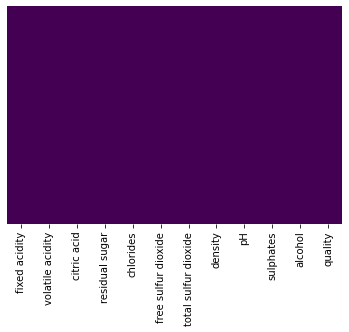

In [13]:
#checking for NULL Values
sns.heatmap(WineData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since there are no missing values, we proceed further.

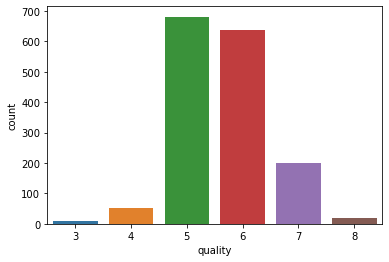

In [14]:
#Bar graph to see quality distribution of our dataset.
sns.countplot(WineData['quality'],label="Count")

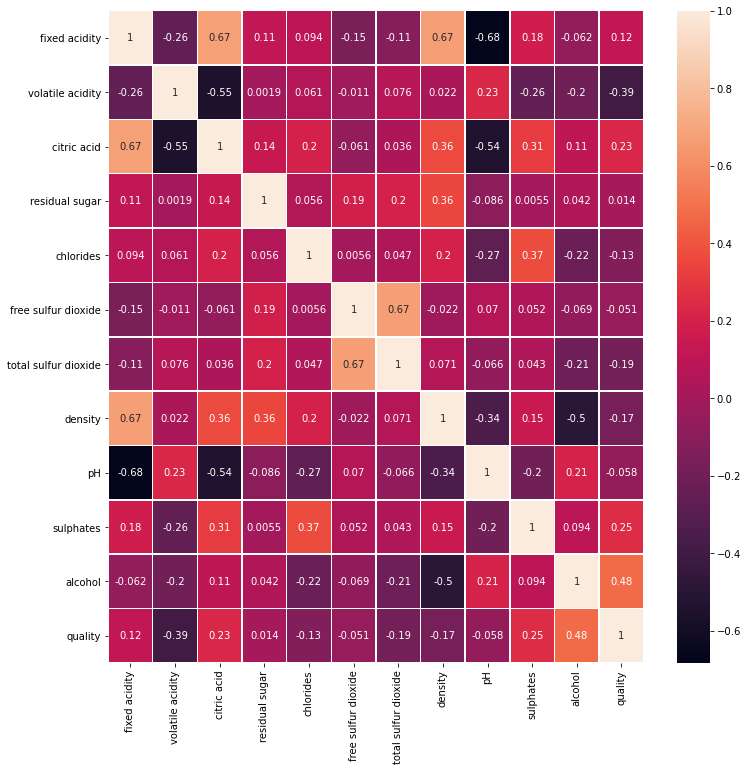

In [15]:
corr_matrix=WineData.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True,linewidths=.5, ax=ax)

Highly correlated features don’t add new information to the model and blurrs the effect of individual feature on the predictor and thus makes it difficult to explain effect of individual features on target feature. This problem is called Multicollinearity. As a general rule, we don’t want to keep features with very high correlation.

Since fixed acidity, citric acid and density are highly corelated, they do not provide any extra information. So we drop citric acid and density. SImilarly free sulphur dioxide and total sulphur dioxide are highly co-realted, we drop the column free sulphur dioxide.

In [16]:
#Dropping the above stated attributes.
WineData.drop(['citric acid','density','free sulfur dioxide'],axis=1,inplace=True)

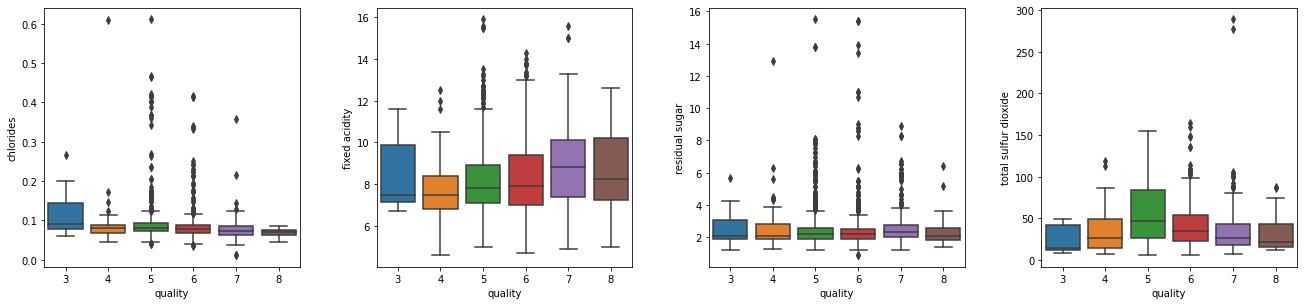

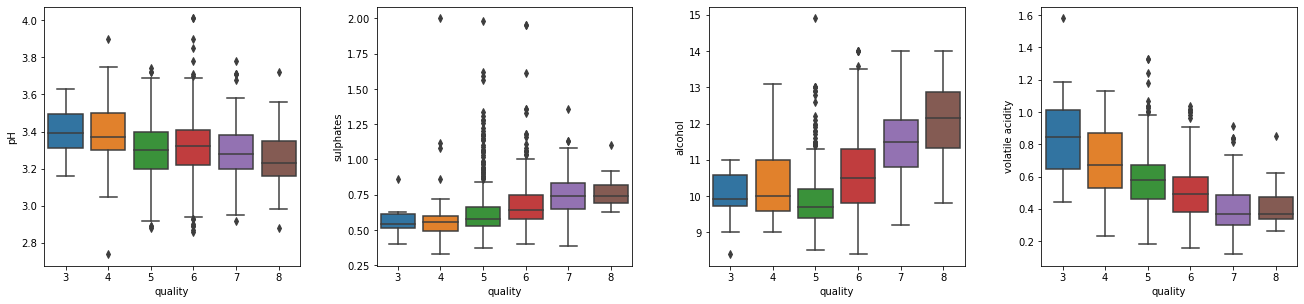

In [17]:
# Boxplots to study individual attribute relationships with 'quality'.
left  = 0.1  # the left side of the subplots of the figure
right = 3    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 1      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

f, axes = plt.subplots(1, 4)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('quality', 'chlorides', data = WineData,   ax=axes[0])
sns.boxplot('quality', 'fixed acidity', data = WineData,  orient='v' , ax=axes[1])
sns.boxplot('quality', 'residual sugar', data = WineData,  orient='v' , ax=axes[2])
sns.boxplot('quality', 'total sulfur dioxide', data = WineData,  orient='v' , ax=axes[3])

f, axes = plt.subplots(1, 4)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('quality', 'pH', data = WineData,  orient='v' , ax=axes[0])
sns.boxplot('quality', 'sulphates', data = WineData,  orient='v' , ax=axes[1])
sns.boxplot('quality', 'alcohol', data = WineData,  orient='v' , ax=axes[2])
sns.boxplot('quality', 'volatile acidity', data = WineData,  orient='v' , ax=axes[3])

In [19]:
# Divide the 'quality' attribute for classifcation as bad=0, good=1, very good=2 and excellent=3.
WineData['quality label'] = WineData.quality.apply(lambda q: '0' if q <=3 else '1' if q <= 5 else '2' if q <= 7 else '3')

In [20]:
WineData.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality,quality label
0,7.4,0.70,1.9,0.076,34.0,3.51,0.56,9.4,5,1
1,7.8,0.88,2.6,0.098,67.0,3.20,0.68,9.8,5,1
2,7.8,0.76,2.3,0.092,54.0,3.26,0.65,9.8,5,1
3,11.2,0.28,1.9,0.075,60.0,3.16,0.58,9.8,6,2
4,7.4,0.70,1.9,0.076,34.0,3.51,0.56,9.4,5,1


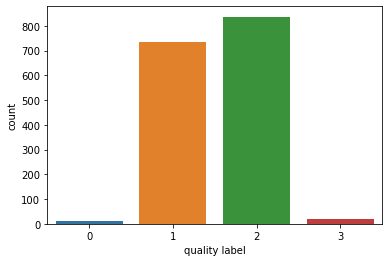

In [21]:
#Bar graph to see quality distribution of our dataset.
sns.countplot(WineData['quality label'],label="Count")

Next,we will normalize the independant variables. so as to reduce bias towards any particular variables. This is quite useful as the range of the variables are highly varied between the variables and name our independant variables x and target variable y. We will scale the values of all our independant variables to a range of 0-1. We will leave our target variable as is for convenience.

In [22]:
from sklearn import preprocessing
NewData=WineData[WineData.columns.drop("quality", "quality label")]
NormalizedData=preprocessing.minmax_scale(NewData)
DataResult=WineData["quality label"]

#### Multiple Linear regression

And we have prepared our data as required, now, finally all we need to do is split the dataset into a training and testing dataset.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NormalizedData, DataResult, test_size=0.33, random_state=42)

since the attributes are independent and we also observe some linear patterns of attributes like sulphates, alcohol, volatile acidity, we apply multiple linear regression to out model.

In [24]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression().fit(X_train,y_train)

We will take a look at the root mean square error of our model on the test set to have a better idea of the predicting power of the model.

In [25]:
from sklearn.metrics import mean_squared_error
score1=clf.score(X_train, y_train)
print("R^2 =", score1)
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print(train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
test_rmse

R^2 = 1.0
5.192340893785638e-16


5.299520897308015e-16

R^2 is literally the sqare of CORRELATION between X and y VARIABLES i.e Linear association between x and y VARIABLES.

In Regression R^2 Regression Model tells about the amount of variability in y that is explained by the model.
100% indicates that the model explains. all the variability of the response data around its mean. R^2 is the most common measure of of the over all model FITTING procedure of a regression line used for predicting and forecasting.

The valuesbetween -1 and +1.

R^2 is called COEFFICIENT of Determination and COEFFICIENT OF multiple determination for multiple REGRESSION. R^2 is useful to study MULTIVARIATE MODELS AND FRACTIONAL VARIATIONS in dependent VARIABLE that is the result of all Independent VARIABLES.

RMSE
RMSE is the sqare of variance of residuals.
RM SE :: Residual Mean Sqare ERROR is the standard deviation of the residuals (prediction errors)
Residuals are a measure of how far Data points from the regression line
It is a measure of how spread the residuals are and how much data is concentrated around the line of fit

Since dataset is small and fully numerical, KNNs would be feasible and make a good choice as a classification model. Also, since attributes are independent, decision trees also would make a good classfication model.

In [26]:

from sklearn.tree import DecisionTreeClassifier
# Fit training data
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
# Predict test data
y_pred = classifier.predict(X_test)

Confusion matrix
 [[  2   0   0   0]
 [  0 236   0   0]
 [  0   0 283   0]
 [  0   0   0   7]] 

Confusion matrix plot


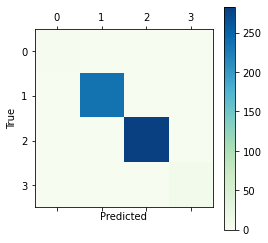

Classfication report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       236
           2       1.00      1.00      1.00       283
           3       1.00      1.00      1.00         7

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528

Accuracy score
1.0


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
c_m = confusion_matrix(y_test, y_pred)
print ("Confusion matrix\n", c_m,'\n')
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print ("Classfication report")
print(classification_report(y_test, y_pred)) 
print ("Accuracy score")
print (accuracy_score(y_test,y_pred))

In [29]:
# value of k computed with cross validation scoring and precision
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
ks=25
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range (1, ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.99431818, 0.99242424, 0.99242424, 0.99242424, 0.99431818,
       0.99431818, 0.99242424, 0.98863636, 0.9905303 , 0.98106061,
       0.98295455, 0.97537879, 0.98106061, 0.97727273, 0.97727273,
       0.97537879, 0.97537879, 0.97537879, 0.97727273, 0.97727273,
       0.97727273, 0.97537879, 0.97916667, 0.97727273])

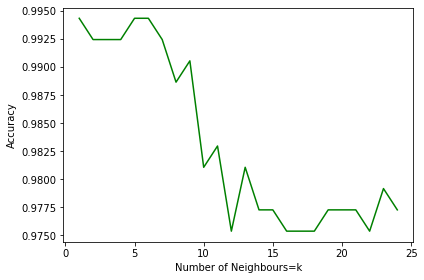

In [30]:
plt.plot(range(1,ks),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbours=k')
plt.tight_layout()
plt.show()